In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import obspy
from obspy.core import read, UTCDateTime, Stream
from obspy.clients.fdsn.client import Client
from obspy.geodetics import gps2dist_azimuth
from matplotlib.transforms import blended_transform_factory


In [2]:
client = Client('IRIS')
t1 = UTCDateTime("2013-09-03T20:19:08.880")
t2 = UTCDateTime("2013-09-03T21:25:18.380")
t3 = UTCDateTime("2013-09-03T22:29:33.000")
t4 = UTCDateTime("2013-09-04T00:23:12.230")

tstart = UTCDateTime("2018-10-22T05:39:39.000")
tend = t1 + 4.6*60*60

t1_diff = np.abs(t1 - tstart)
t2_diff = np.abs(t2 - tstart)
t3_diff = np.abs(t3 - tstart)
t4_diff = np.abs(t4 - tstart)
17
eq_lat = 51.0078
eq_lon = -130.6787

In [3]:
from io_scripts import gmap2inv

inv = gmap2inv('../data/2019-doublet-gmap.txt', '*', 'BHZ,HHZ,BH1,HH1,BH2,HH2,BHN,HHN,BHE,HHE,HNE,HNN,HNZ')


Downloaded network: CN


In [ ]:
print(inv.select(station='J50C'))

In [ ]:
from io_scripts import obs_orientation

inv = obs_orientation(inv, '/local/lyakuden/offshore_bc/bc-multiplets/data/obs-orientations.txt')

# only keep netwrok 7D
# inv = inv.select(network='7D')
print(inv)

# save the inventory
# inv.write('2013-stations-7D.xml', format='STATIONXML')

In [4]:
# remove_net = []
# remove_sta = []for network in inv:
#     for station in network:
#         if station.code in ['J50C']:
#             st += client.get_waveforms(network=network.code, station=station.code, location='*', channel='HHZ', starttime=tstart, endtime=tend)
# # remove stations whose **1 and **2 azimuths don't differ by 90, -90, 270, or -270
# for network in inv:
#     for station in network:
#         for channel in station:
#             if channel.code[-1] == '1':
#                 az1 = channel.azimuth
#             elif channel.code[-1] == '2':
#                 az2 = channel.azimuth
#                 if np.abs(az1 - az2) not in [90, -90, 270, -270]:
#                     remove_sta.append(station.code)
#                     remove_net.append(network.code)

# for net, sta in zip(remove_net, remove_sta):for network in inv:
#     for station in network:
#         if station.code in ['J50C']:
#             st += client.get_waveforms(network=network.code, station=station.code, location='*', channel='HHZ', starttime=tstart, endtime=tend)
#     inv = inv.remove(network=net, station=sta)

# print(inv)
inv.write('../data/2018-CN-stations.xml', format='STATIONXML')

In [5]:
def _dip_azimuth2zne_base_vector(dip, azimuth):for network in inv:
    for station in network:
        if station.code in ['J50C']:
            st += client.get_waveforms(network=network.code, station=station.code, location='*', channel='HHZ', starttime=tstart, endtime=tend)
    """
    Helper function converting a vector described with azimuth and dip of unit
    length to a vector in the ZNE (Vertical, North, East) base.

    The definition of azimuth and dip is according to the SEED reference
    manual.
    """
    dip = np.deg2rad(dip)
    azimuth = np.deg2rad(azimuth)

    return np.array([-np.sin(dip),
                     np.cos(azimuth) * np.cos(dip),
                     np.sin(azimuth) * np.cos(dip)])

def dummy_rotation(dip_1, azimuth_1, dip_2, azimuth_2, dip_3, azimuth_3):

    # Define the base vectors of the old base in terms of the new base vectors.
    base_vector_1 = _dip_azimuth2zne_base_vector(dip_1, azimuth_1)
    base_vector_2 = _dip_azimuth2zne_base_vector(dip_2, azimuth_2)
    base_vector_3 = _dip_azimuth2zne_base_vector(dip_3, azimuth_3)

    # Base change matrix.
    m = np.array([base_vector_1,
                    base_vector_2,
                    base_vector_3])

    # Determinant gives the volume change of a unit cube going from one
    det = np.linalg.det(m)
    if not (1E-6 < abs(det) < 1E6):
        None
    return det

In [ ]:
determinants = []

# make new inventory of stations with channels ending in 1 and 2
inv1 = inv.select(network='7D')

# get the azimuths and dips of the channels
for network in inv1:
    for station in network:
        

        az1, az2, az3, dip1, dip2, dip3 = None, None, None, None, None, None
        for channel in station:
            if channel.code[-1] == '1':
                az1 = channel.azimuth
                dip1 = channel.dip
            elif channel.code[-1] == '2':
                az2 = channel.azimuth
                dip2 = channel.dip
            elif channel.code[-1] == 'Z':
                dip3 = channel.dip
                az3 = channel.azimuth
        if dummy_rotation(dip1, az1, dip2, az2, dip3, az3) < 0:
            print(station.code)
            print(dip1, az1, dip2, az2, dip3, az3)
            print(dummy_rotation(dip1, az1, dip2, az2, dip3, az3))
            print()
        # print(dummy_rotation(dip1, az1, dip2, az2, dip3, az3))
        

print(determinants)for network in inv:
    for station in network:
        if station.code in ['J50C']:
            st += client.get_waveforms(network=network.code, station=station.code, location='*', channel='HHZ', starttime=tstart, endtime=tend)
# print(dummy_rotation(0, 0, 0, 0, -90, 0))


In [ ]:
# print the azimuth difference between **1 and **2 channels for every station
for network in inv:
    for station in network:
        if station.selecelect(network=net, station=sta).detach()t(channel="HH1") and station.select(channel="HH2"):
            print(station.code, station.select(channel="HH1")[0].azimuth - station.select(channel="HH2")[0].azimuth)
        if station.select(channel="BH1") and station.select(channel="BH2"):
            print(station.code, station.select(channel="BH1")[0].azimuth - station.select(channel="BH2")[0].azimuth)

In [ ]:
inv.get_orientation('7D.J50C..HH1')

In [6]:
latlon = []

for i in range(len(st)):
    latlon.append((metadata[i][0][0].latitude, metadata[i][0][0].longitude))

for tr, latlon in zip(st, latlon):
    tr.stats.distance = gps2dist_azimuth(eq_lat, eq_lon, latlon[0], latlon[1])[0]

In [37]:
eventtime = UTCDateTime("2018-10-22T05:39:39.000")
starttime = eventtime - 20
endtime = starttime + 300

In [46]:
print(inv)

Inventory created at 2024-11-06T02:42:19.096979Z
	Created by: ObsPy 1.4.1
		    https://www.obspy.org
	Sending institution: IRIS-DMC,ObsPy 1.4.1 (IRIS-DMC)
	Contains:
		Networks (21):
			1E, 2K, AK, AT, C8, CC, CN, GS, NP, NV, OO, OW, PN, PO, PQ, TA, UO
			US, UW, X4, XL
		Stations (470):
			1E.MONT1 (Z)
			1E.MONT3 (Z)
			1E.MONT4 (Z)
			1E.MONT5 (Z)
			1E.MONT6 (Z)
			1E.MONT7 (Z)
			2K.KW006 (Z)
			AK.BESE (Bessie Mountain, AK, USA)
			AK.JIS (Juneau Island, AK, USA)
			AT.CRAG (Craig, Alaska)
			AT.SIT (Sitka, Alaska)
			C8.BNKB (Banks Island, BC, CA)
			C8.BUTB (Butedale, BC, CA)
			C8.GRIB (Gribbell Island, BC, CA)
			C8.GRNB (Grenville Island, BC, CA)
			C8.HWKB (Hawksbury Island, BC, CA)
			C8.KITB (Kitimat, BC, CA)
			C8.MBLB (Minette Bay lodge, BC, CA)
			C8.MWAB (Mount Washington, BC, CA)
			C8.PA01 (Sidney PGC North, BC, CA)
			C8.SPLB (Strathcona Park Lodge, BC, CA)
			C8.TOFB (Tofino, BC, CA)
			CC.AWST (Mount Adams West)
			CC.CARB (Carbon Repeater)
			CC.JRO (Johnston R

In [48]:
# add to the stream from the inventory
st = Stream()
for network in inv:
    for station in network:
        try:
            st += client.get_waveforms(network=network.code, station=station.code, location='*', channel='*', starttime=starttime, endtime=endtime)
        except:
            print('No data for', network.code, station.code)

No data for CN BTB
No data for CN GHNB
No data for CN MGRB
No data for CN MYRA
No data for CN NTKA
No data for CN PNT
No data for CN TOFB
No data for CN WOSB
No data for C8 BNKB
No data for C8 MWAB
No data for C8 PA01
No data for C8 SPLB
No data for C8 TOFB
No data for UO EOLA
No data for OW MYRA
No data for OW PRAL
No data for 2K KW006
No data for CC CARB
No data for CC PANH
No data for CC PR01
No data for CC REM
No data for GS BAL
No data for GS CHIN
No data for GS CIN
No data for GS CRCK
No data for GS CSOK
No data for GS FINI
No data for GS HAOK
No data for GS ICR
No data for GS LAU
No data for GS LOES
No data for GS MER
No data for GS MS10
No data for GS MS8B
No data for GS NV2
No data for GS PFS6
No data for GS PIO2
No data for GS RDM2
No data for GS SEW
No data for GS SOC3
No data for GS TFD
No data for GS UNK
No data for GS UNV
No data for GS WE2
No data for UW BST01
No data for UW BST02
No data for UW BST03
No data for UW ELW
No data for UW EVCC
No data for UW HTW
No data for 

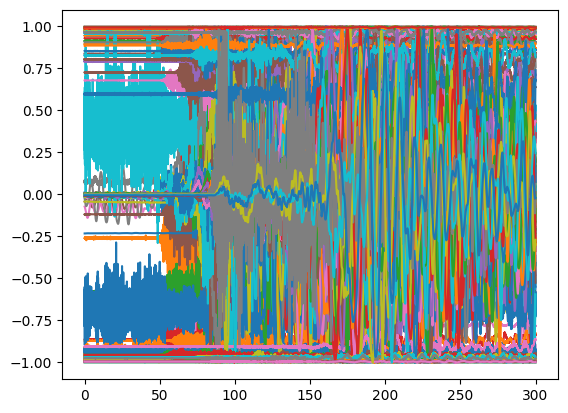

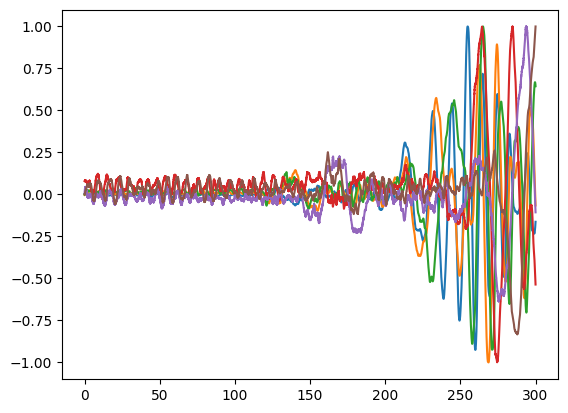

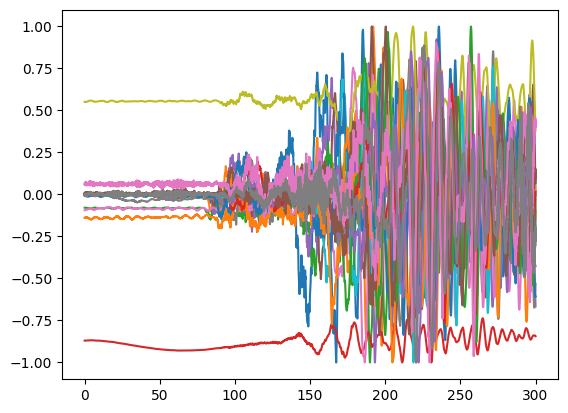

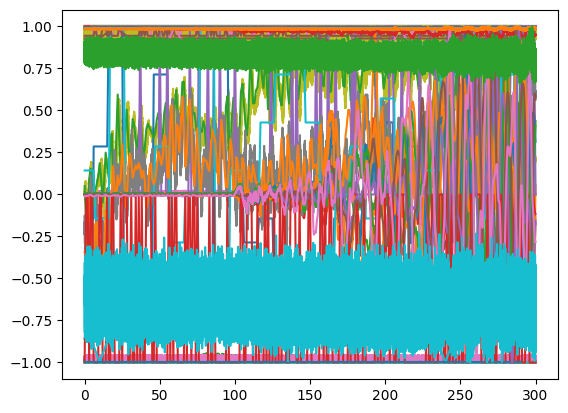

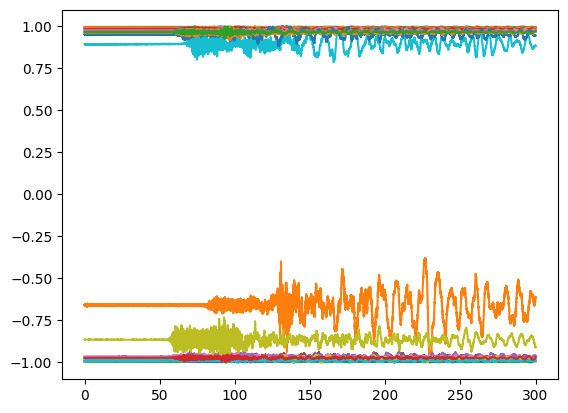

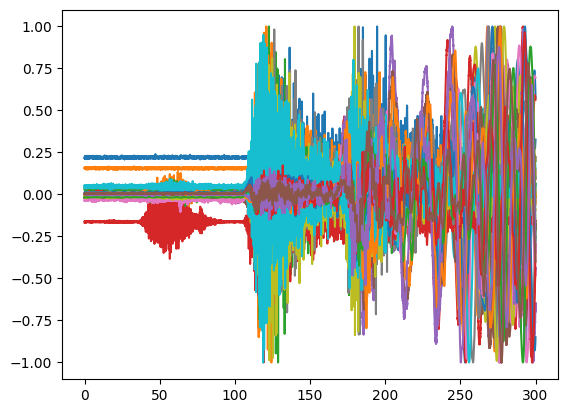

/tmp/ipykernel_351184/4217185475.py:9: RuntimeWarning: invalid value encountered in divide
  tr.data = tr.data / np.max(np.abs(tr.data))


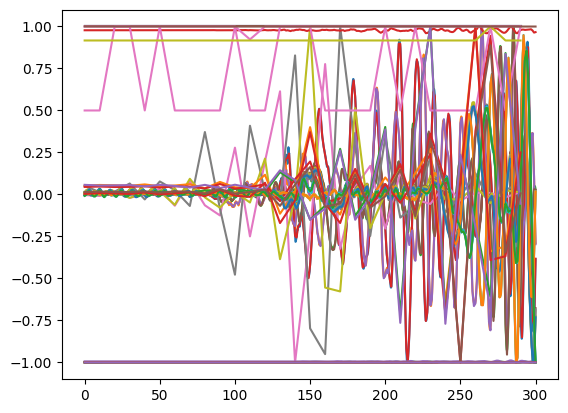

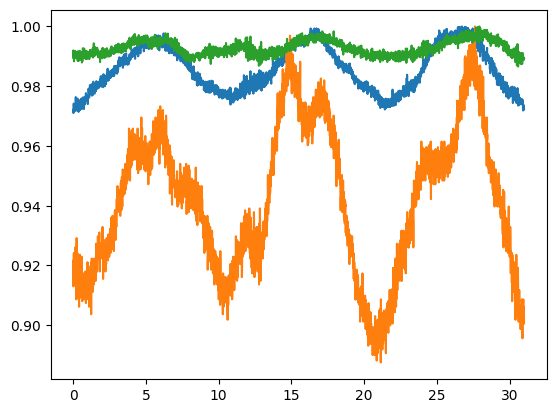

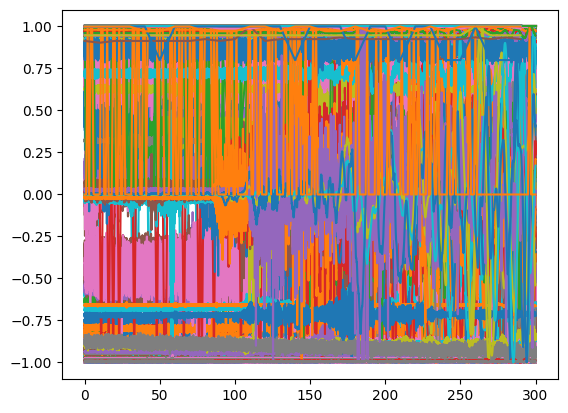

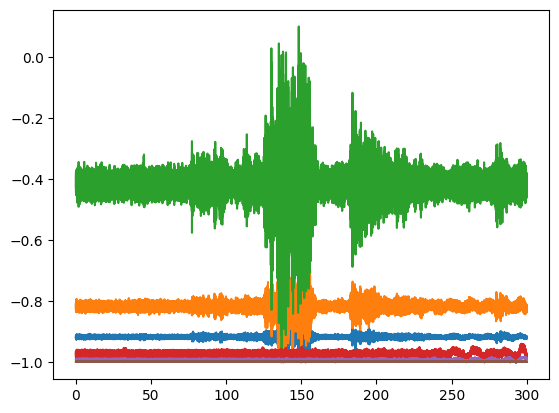

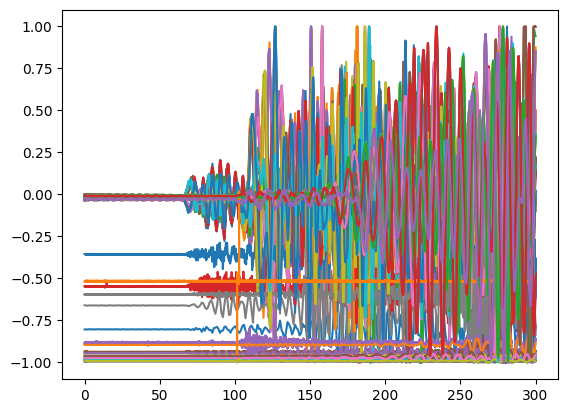

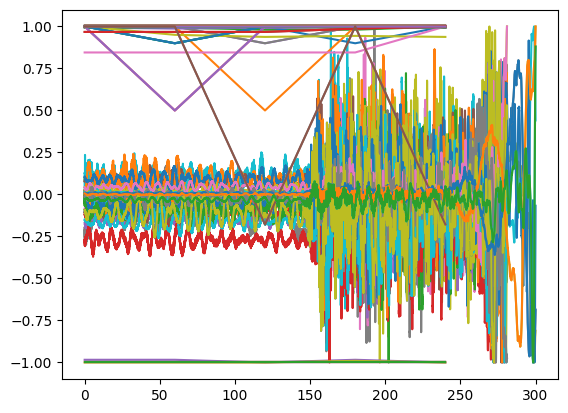

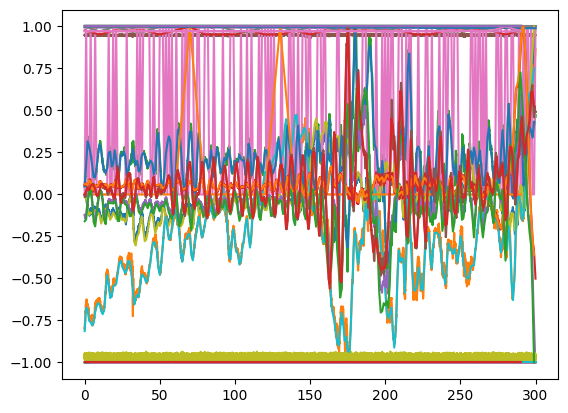

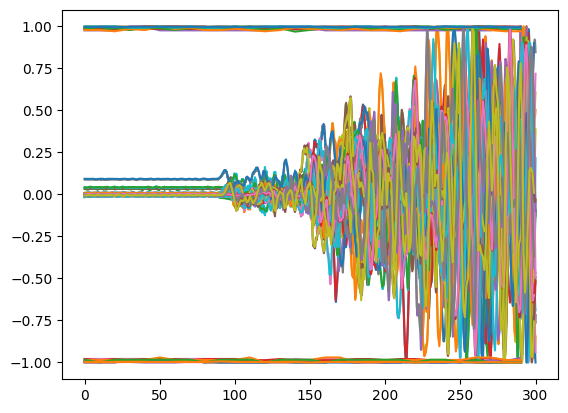

UFuncTypeError: ufunc 'absolute' did not contain a loop with signature matching types <class 'numpy.dtypes.BytesDType'> -> None

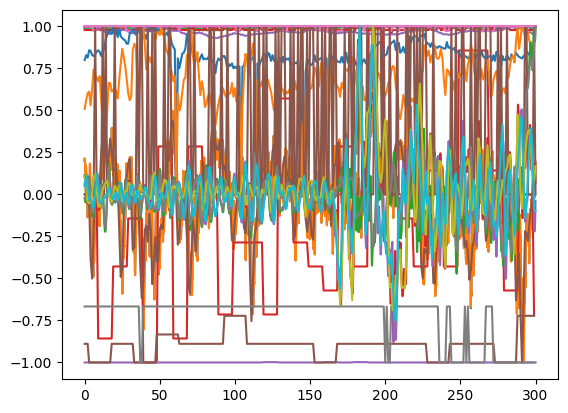

In [52]:
# plot each network separately 
for network in inv:
    network = st.select(network=network.code)
    if len(network) == 0:
        continue
    fig, ax = plt.subplots()
    for tr in network:
        # normalize the data
        tr.data = tr.data / np.max(np.abs(tr.data))
        ax.plot(tr.times(), tr.data, label=tr.id)
    plt.show()

In [ ]:
st.filter('bandpass', freqmin=0.1, freqmax=10)

fig = plt.figure(figsize=(6, 10))
st.plot(type='section', time_down=True, fig=fig, )

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
    
ax.axhline(t1_diff, color='red', lw=1)
ax.axhline(t2_diff, color='red', lw=1)
ax.axhline(t3_diff, color='red', lw=1)
ax.axhline(t4_diff, color='red', lw=1)

ax.text(780, t1_diff+200, 'Mw 6.1', color='red', va='center', ha='center')
ax.text(780, t2_diff+200, 'Mw 5.3', color='red', va='center', ha='center')
ax.text(780, t3_diff+200, 'Mw 5.4', color='red', va='center', ha='center')
ax.text(780, t4_diff+200, 'Mw 6.0', color='red', va='center', ha='center')

ax.set_title(f'{t1.strftime("%Y-%m-%d %H:%M:%S")} 7D (Cascadia Initiative) BHZ', y=1.05)